In [86]:
#calling the modules I need to run data analysis and visualize data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [87]:
#Pulling the file I need from the Cat_Art folder
Results = pd.read_csv("/Users/sa12/Desktop/Cat_Art/Cat_Results.csv")
#a variable to hold only results
Combo_Votes = pd.DataFrame({"Students":Results["Student Vote"], "Teachers":Results["Teacher Vote"]})
#a varible to hold only cats and whether they had a signiture
Cats_Signed = pd.DataFrame({"Cats":Results["Cat in Box"], "Signed?":Results["Signed?"]}).dropna()

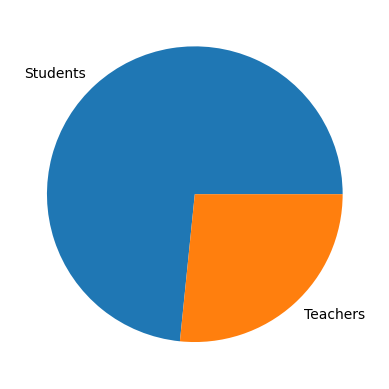

In [88]:
#How many students drew cats?
Number_of_Cats = Results["Cat in Box"].count()
#How many students voted?
Number_of_Students = Results["Student Vote"].count()
#How many teachers voted?
Number_of_Teachers = Results["Teacher Vote"].count()
Counts = [Number_of_Students,Number_of_Teachers]
#vote distribution
plt.pie(Counts, labels=("Students","Teachers"))
plt.show()

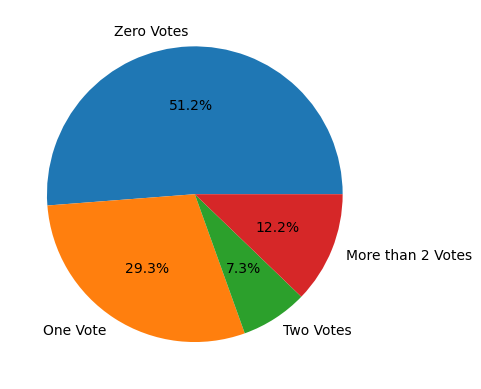

In [89]:
#Count the number of times each number appears
Student_Votes = Results["Student Vote"].value_counts()
Teacher_Votes = Results["Teacher Vote"].value_counts()
#collection of all cats that recieved a vote
vote_set = set(Results[["Student Vote", "Teacher Vote"]].values.flatten())
#find how many cats recieved various vote values
zero = 0
one = 0
two = 0
more_than_2 = 0
#number of cats that recieved 0 votes
for cat in Results["Cat in Box"]:
    if cat not in vote_set:
        zero += 1
#how many votes did each cat that recieved votes from students recieve
for cat in Student_Votes:
    if cat == 1:
        one += 1
    if cat == 2:
        two += 1
    if cat > 2:
        more_than_2 += 1
#Now to find cats that are only voted by teachers
Teachers_Only = []
#and all cats voted on by teachers
Teachers_All = []
#empty lists for comparison
Students_Only = []
Students_All = []
#add all student votes to list
for stu in Combo_Votes["Students"]:
        if math.isnan(stu) == False:
            Students_All.append(int(stu))
#cross check the teacher list and add any values not in student votes to Teachers_Only
for teach in Combo_Votes["Teachers"]:
    if math.isnan(teach) == False:
        Teachers_All.append(int(teach))
        if teach not in Students_All:
            Teachers_Only.append(int(teach))
#fill the student only variable with students not in the Teachers_All list
for stu in Combo_Votes["Students"]:
    if stu not in Teachers_All:
        Students_Only.append(int(stu))
#make it into a dataframe...
Teachers_Only_df = pd.DataFrame({"Cat":Teachers_Only})
#so I can do value counts
Teachers_Only_Counts = Teachers_Only_df["Cat"].value_counts()
#use same process as before but with only teach votes
for cat in Teachers_Only_Counts:
    if cat == 1:
        one += 1
    if cat == 2:
        two += 1
    if cat > 2:
        more_than_2 += 1  
plt.pie((zero, one, two, more_than_2), labels=("Zero Votes","One Vote", "Two Votes", "More than 2 Votes"),autopct="%1.1f%%")
plt.show()
#put them onto a chart

/var/folders/t3/tq1z8cy535bck4xjwkvc0_xh0000gn/T/ipykernel_57726/4223961410.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(All_Votes_df_counts_3min, palette="flare")


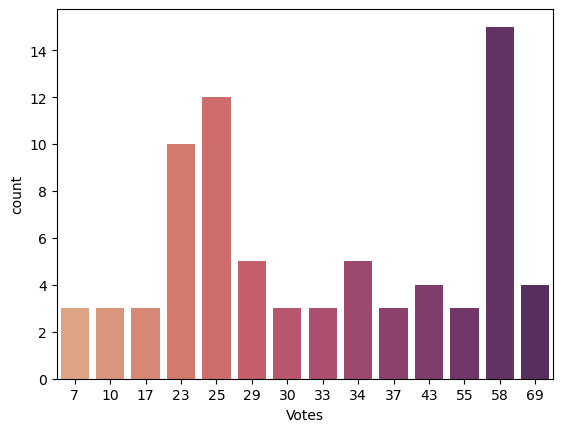

In [90]:
All_Votes = Teachers_All + Students_All
All_Votes_df = pd.DataFrame({"Votes":All_Votes})
All_Votes_df_counts = All_Votes_df["Votes"].value_counts()
All_Votes_df_counts_3min = All_Votes_df_counts[All_Votes_df_counts > 2]
sns.barplot(All_Votes_df_counts_3min, palette="flare")
plt.show()

/var/folders/t3/tq1z8cy535bck4xjwkvc0_xh0000gn/T/ipykernel_57726/114792465.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Student_Votes_min3, palette="crest")


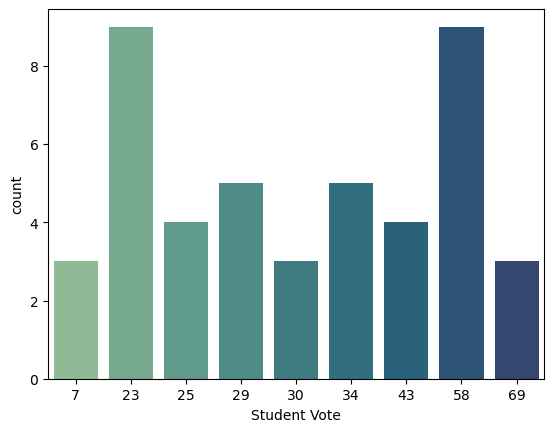

In [91]:
Student_Votes_min3 = Student_Votes[Student_Votes > 2]
sns.barplot(Student_Votes_min3, palette="crest")
plt.show()


/var/folders/t3/tq1z8cy535bck4xjwkvc0_xh0000gn/T/ipykernel_57726/37136198.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Teacher_Votes, palette="viridis")


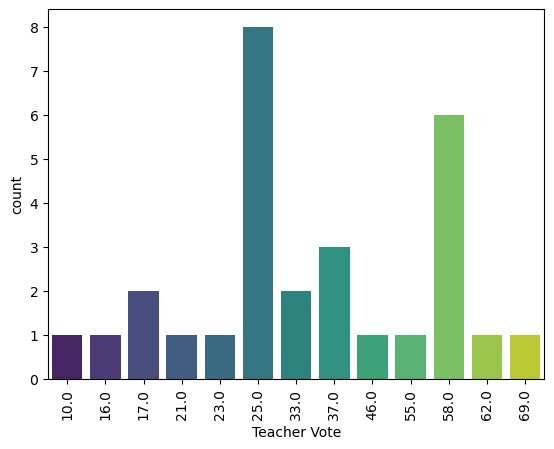

In [92]:
sns.barplot(Teacher_Votes, palette="viridis")
plt.xticks(rotation=90)
plt.show()

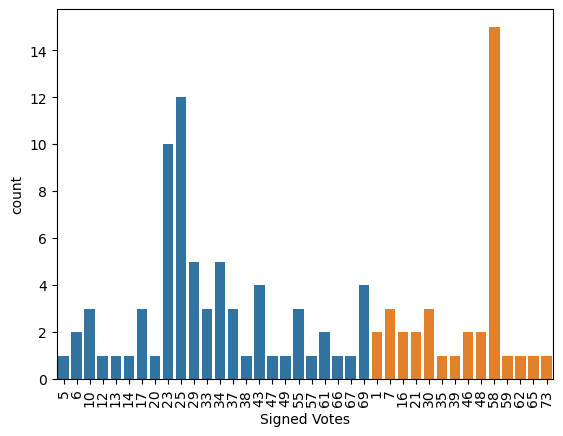

In [93]:
Signed = Cats_Signed[Cats_Signed["Signed?"] == True]
Unsigned = Cats_Signed[Cats_Signed["Signed?"] == False]
signed_cats = []
unsigned_cats = []
for cats in Signed["Cats"]:
    signed_cats.append(cats)
for cats in Unsigned["Cats"]:
    unsigned_cats.append(cats)
signed_total = []
unsigned_total =[]
for cats in signed_cats:
    for vote_cats in All_Votes_df["Votes"]:
        if cats == vote_cats:
            signed_total.append(int(vote_cats))
for cats in unsigned_cats:
    for vote_cats in All_Votes_df["Votes"]:
        if cats == vote_cats:
            unsigned_total.append(int(vote_cats))
signed_df = pd.DataFrame({"Signed Votes":signed_total})
unsigned_df = pd.DataFrame({"Unsigned Votes":unsigned_total})
signed_counts = signed_df["Signed Votes"].value_counts()
unsigned_counts = unsigned_df["Unsigned Votes"].value_counts()
sns.barplot(signed_counts)
sns.barplot(unsigned_counts)
plt.xticks(rotation=90)
plt.show()

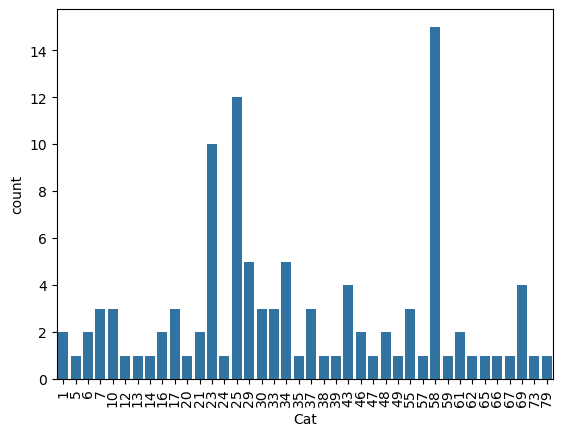

In [94]:
random_cat = []
for cat in All_Votes:
    if cat != 17 or 23 or 27 or 39 or 59 or 55 or 69 or 58 or 25:
        random_cat.append(cat)
random_df = pd.DataFrame({"Cat":random_cat})
random_counts = random_df["Cat"].value_counts()
sns.barplot(random_counts)
plt.xticks(rotation=90)
plt.show()